# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [42]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [43]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [44]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [46]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [47]:
#等寬區間，發現不適用，因有離群值存在，導致大部分數據存在(-91324.35, 11723085.0]內
app_train['AMT_INCOME_TOTAL_grp1']=pd.cut(app_train['AMT_INCOME_TOTAL'],bins=10)
app_train['AMT_INCOME_TOTAL_grp1'].value_counts()

(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(105302565.0, 117000000.0]         1
(93605130.0, 105302565.0]          0
(81907695.0, 93605130.0]           0
(70210260.0, 81907695.0]           0
(58512825.0, 70210260.0]           0
(46815390.0, 58512825.0]           0
(35117955.0, 46815390.0]           0
(23420520.0, 35117955.0]           0
Name: AMT_INCOME_TOTAL_grp1, dtype: int64

In [54]:
#等寬區間，發現不適用，因有離群值存在，導致大部分數據存在(-91324.35, 11723085.0]內，剔除離群值
app_train['AMT_INCOME_TOTAL'] = app_train['AMT_INCOME_TOTAL'].clip(0, 11723085)
app_train['AMT_INCOME_TOTAL_grp2']=pd.cut(app_train['AMT_INCOME_TOTAL'],bins=10)
app_train['AMT_INCOME_TOTAL_grp2'].value_counts()

(24480.256, 142624.35]     150478
(142624.35, 259598.7]      118327
(259598.7, 376573.05]       29380
(376573.05, 493547.4]        6347
(493547.4, 610521.75]        1400
(610521.75, 727496.1]         921
(1078419.15, 1195393.5]       238
(844470.45, 961444.8]         218
(727496.1, 844470.45]         179
(961444.8, 1078419.15]         23
Name: AMT_INCOME_TOTAL_grp2, dtype: int64

In [55]:
#等寬區間，發現不適用，因有離群值存在，導致大部分數據存在(13952.565, 1195393.5]內，剔除離群值
app_train['AMT_INCOME_TOTAL'] = app_train['AMT_INCOME_TOTAL'].clip(0, 1195393.5)
app_train['AMT_INCOME_TOTAL_grp3']=pd.cut(app_train['AMT_INCOME_TOTAL'],bins=10)
app_train['AMT_INCOME_TOTAL_grp3'].value_counts()

(24480.256, 142624.35]     150478
(142624.35, 259598.7]      118327
(259598.7, 376573.05]       29380
(376573.05, 493547.4]        6347
(493547.4, 610521.75]        1400
(610521.75, 727496.1]         921
(1078419.15, 1195393.5]       238
(844470.45, 961444.8]         218
(727496.1, 844470.45]         179
(961444.8, 1078419.15]         23
Name: AMT_INCOME_TOTAL_grp3, dtype: int64

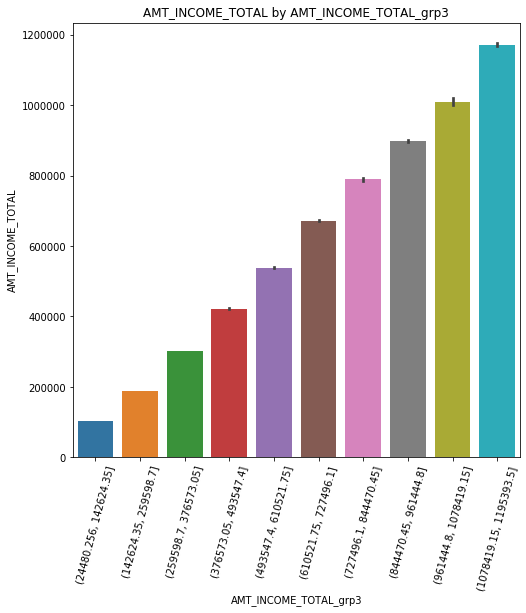

In [51]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = app_train['AMT_INCOME_TOTAL_grp3']
py = app_train['AMT_INCOME_TOTAL']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_INCOME_TOTAL_grp3'); plt.ylabel('AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL by AMT_INCOME_TOTAL_grp3');